# Rain Prediction in Australia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<AxesSubplot:>

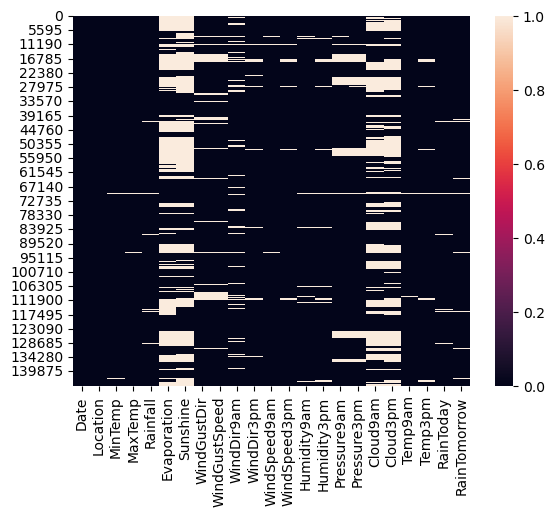

In [8]:
sns.heatmap(df.isnull())

In [9]:
df["Date"]=pd.to_datetime(df["Date"])

In [10]:
df["year"]=df["Date"].dt.year
df["month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day

df.drop("Date",axis=1,inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [11]:
numeric_col=df.select_dtypes(include="float64").columns
numeric_col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [12]:
obj_col=df.select_dtypes(include="object").columns
obj_col

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [13]:
for col in obj_col:
    print(f"{col}: {df[col].nunique()}")

Location: 49
WindGustDir: 16
WindDir9am: 16
WindDir3pm: 16
RainToday: 2
RainTomorrow: 2


In [14]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
year               int64
month              int64
day                int64
dtype: object

In [15]:
df.duplicated().sum()

0

In [16]:
missing = pd.DataFrame(df.isnull().sum(),columns = ['no.of missing values'])

missing['% missing_values']= (missing/len(df)).round(2)*100
missing

,no.of missing values,% missing_values
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0
WindDir3pm,4228,3.0


# Exploratary data analysis:

<AxesSubplot:ylabel='RainTomorrow'>

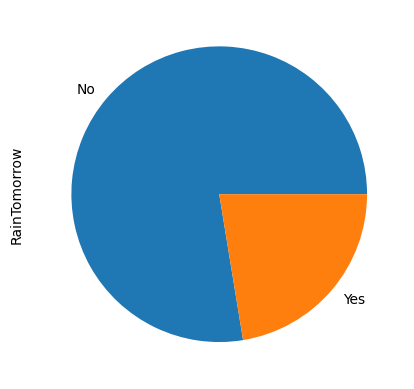

In [17]:
df['RainTomorrow'].value_counts().plot(kind='pie')

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

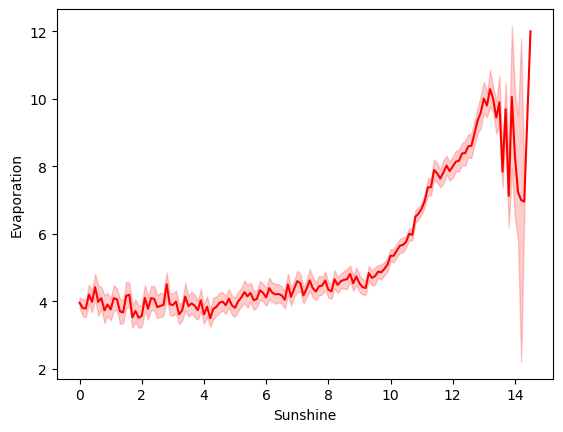

In [18]:
sns.lineplot(data=df,x='Sunshine',y='Evaporation',color='red')

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

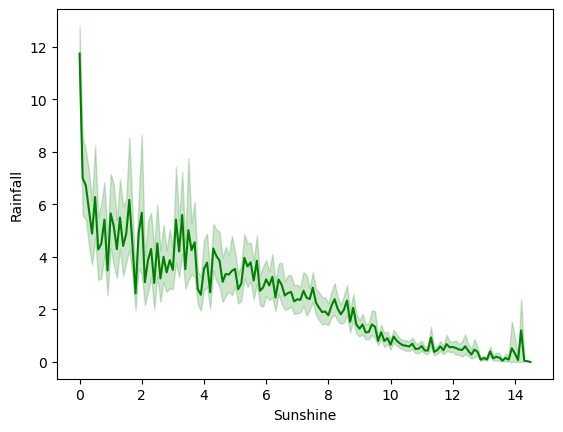

In [19]:
sns.lineplot(data= df,x="Sunshine",y="Rainfall",color = "green")

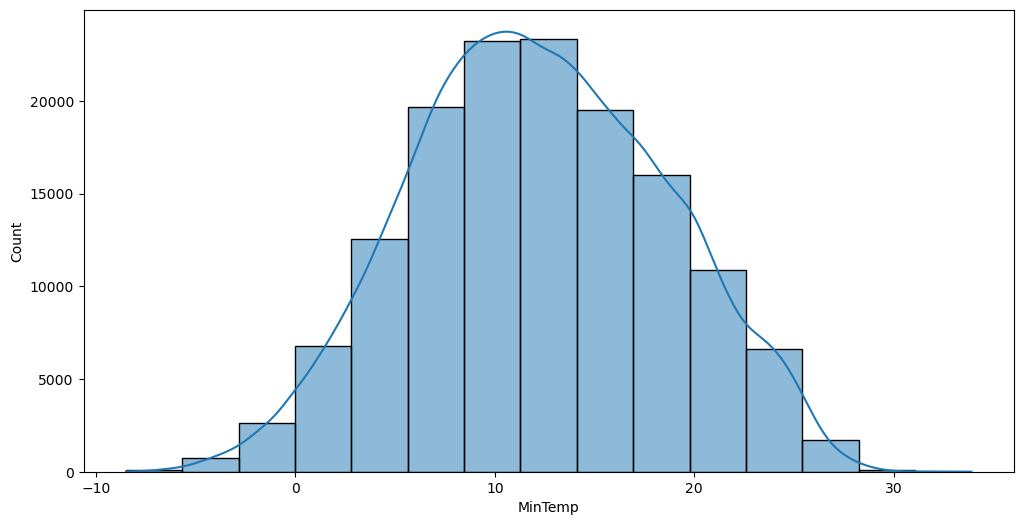

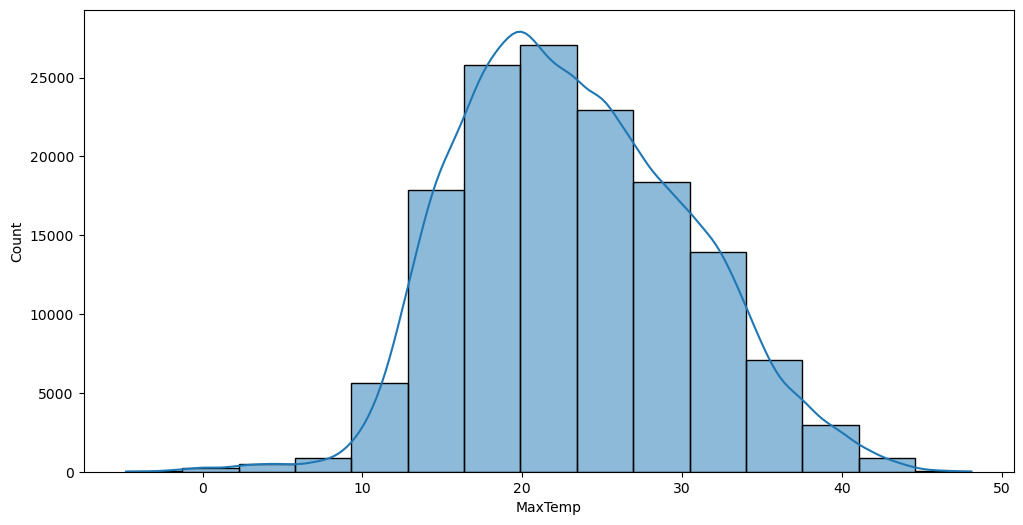

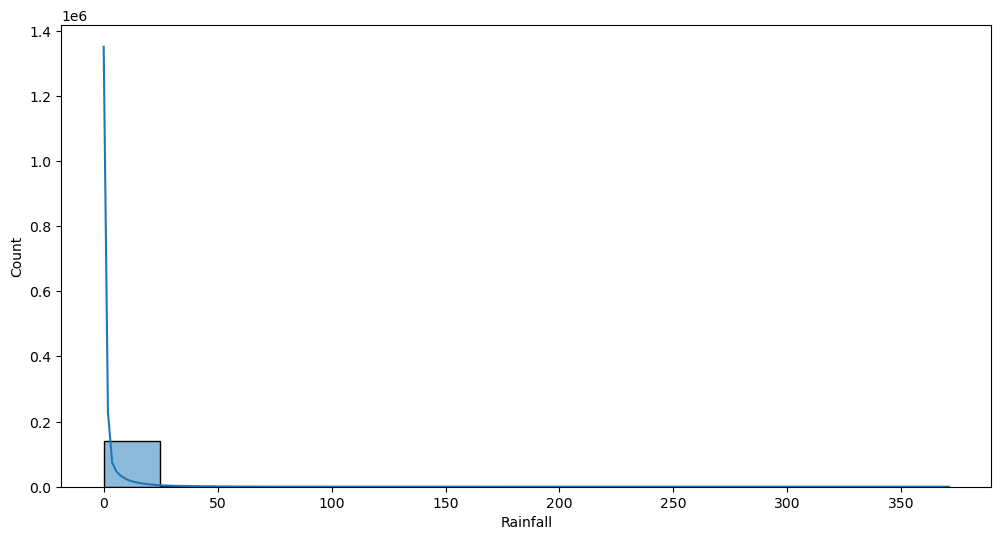

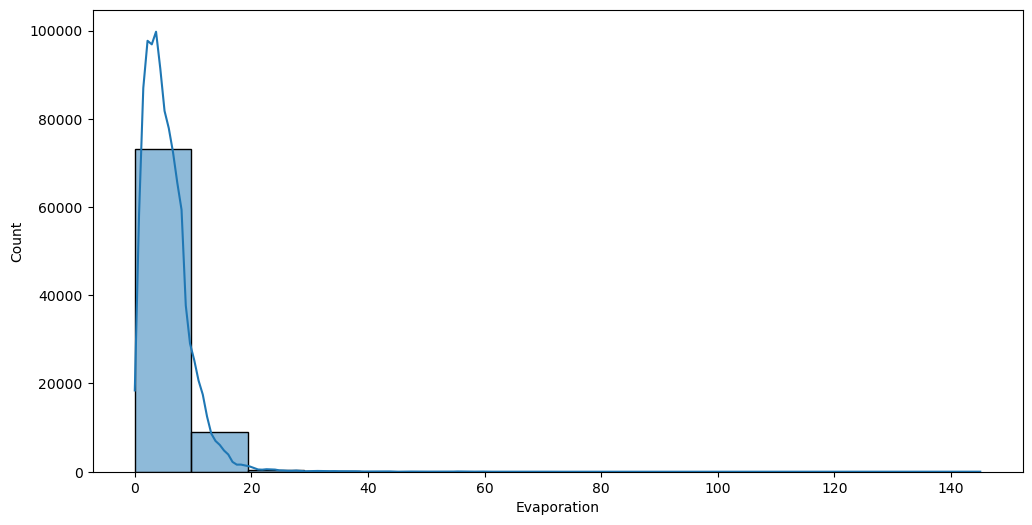

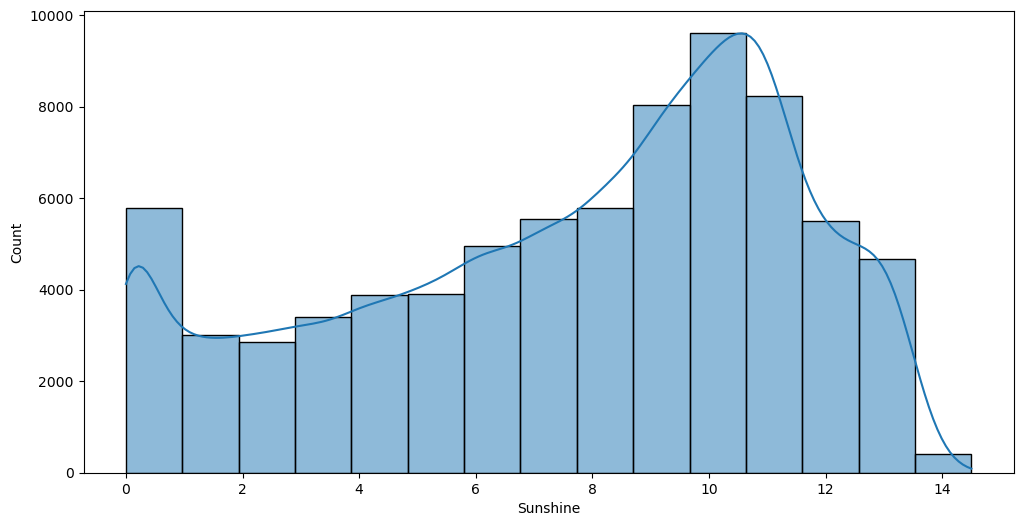

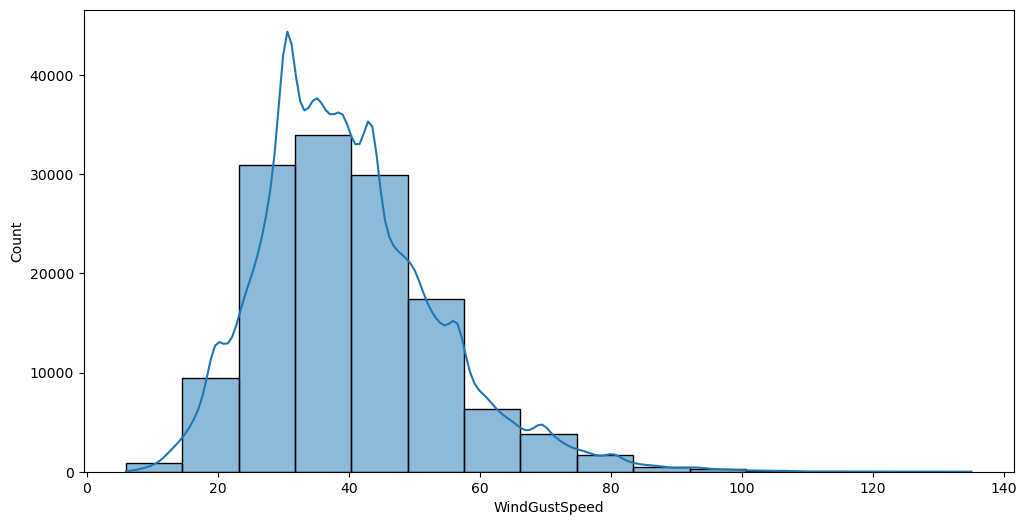

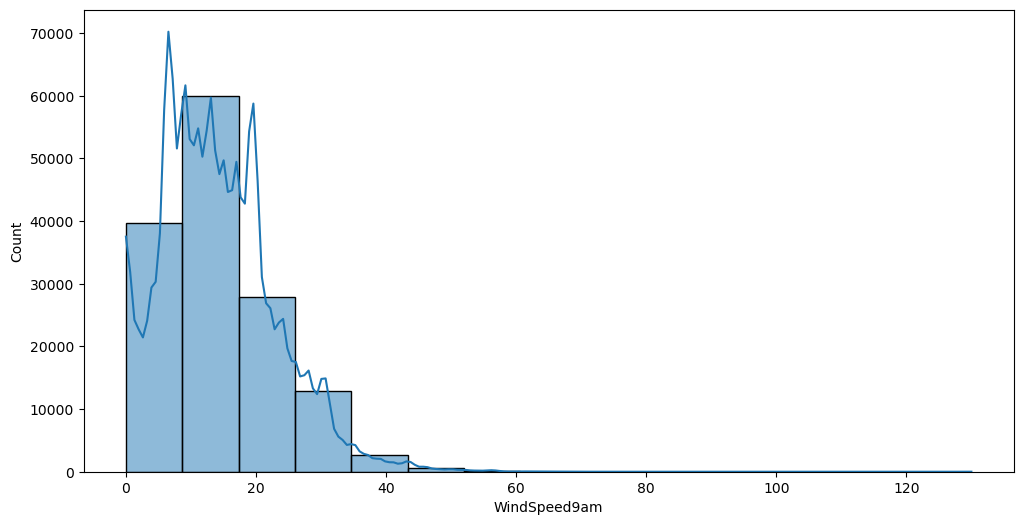

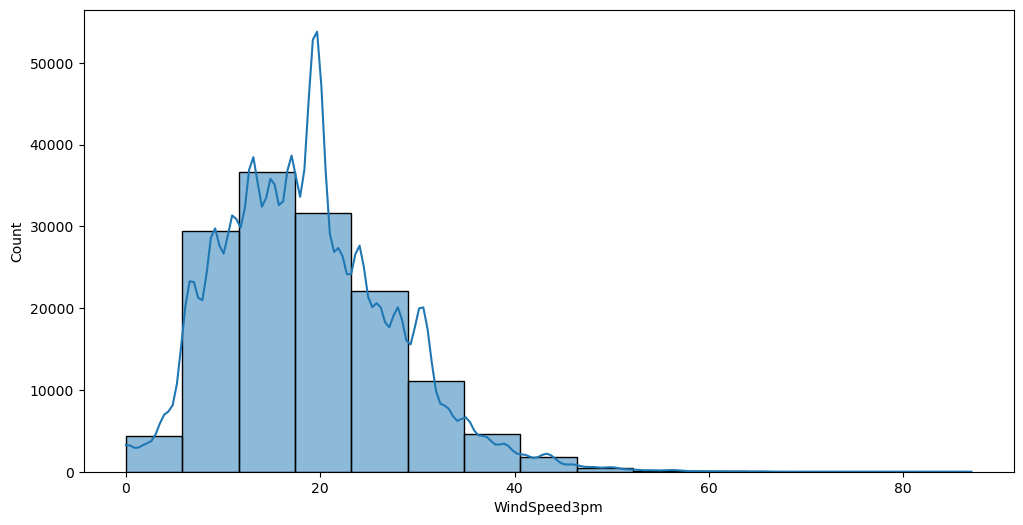

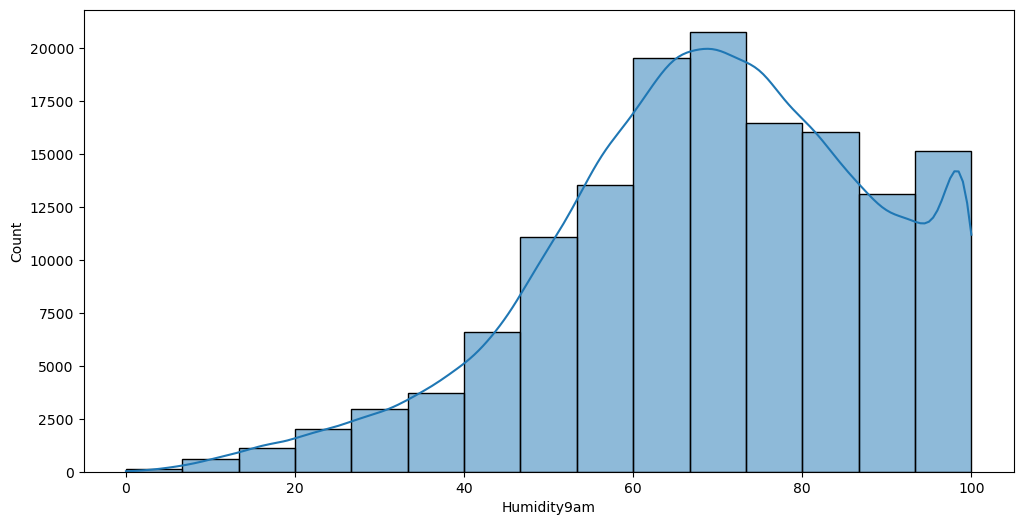

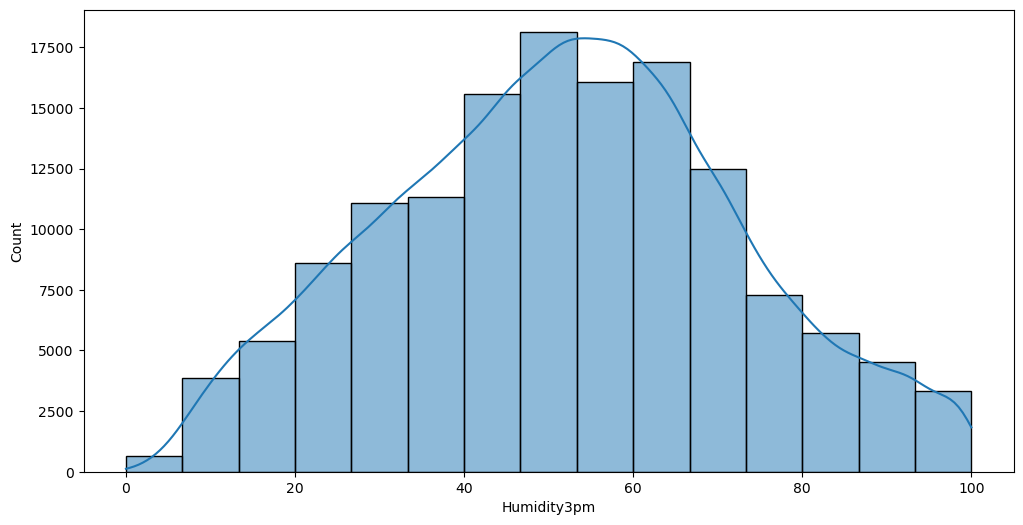

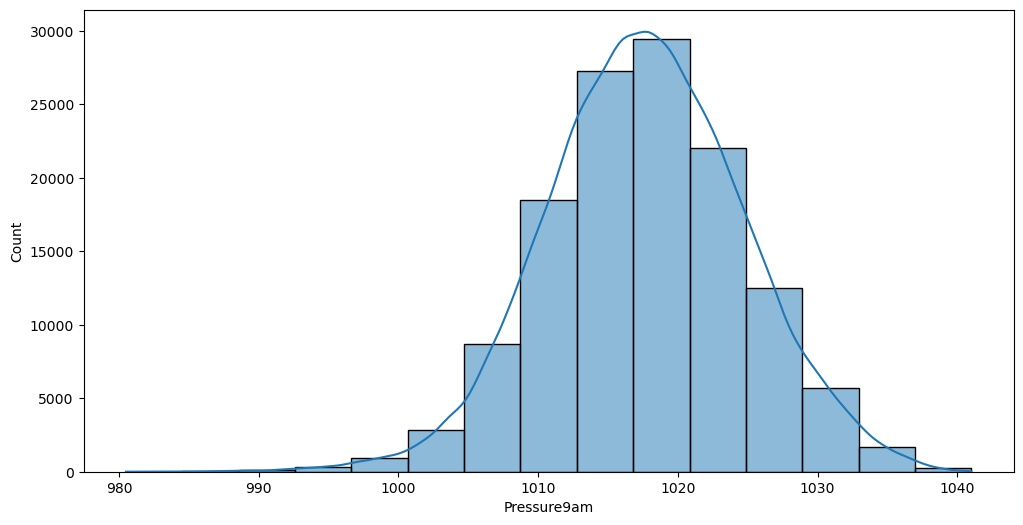

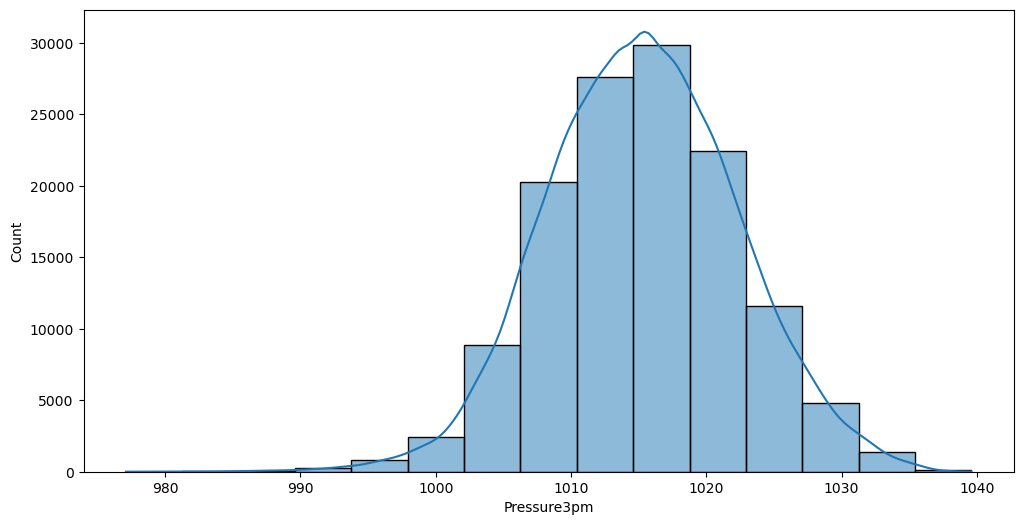

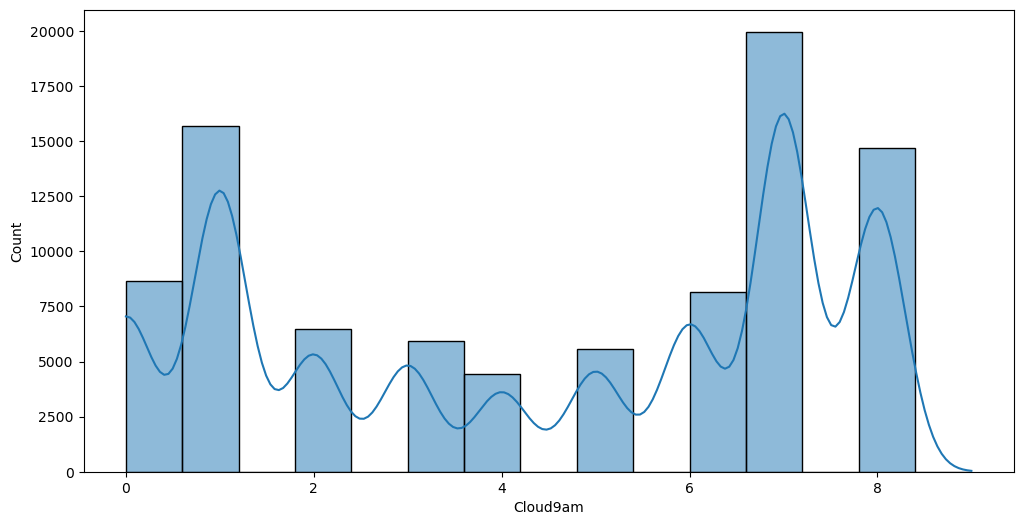

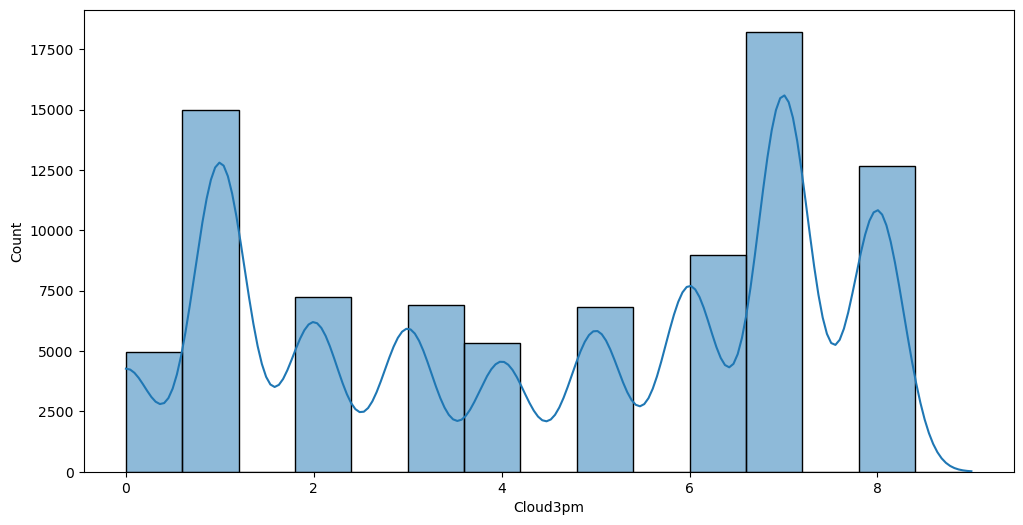

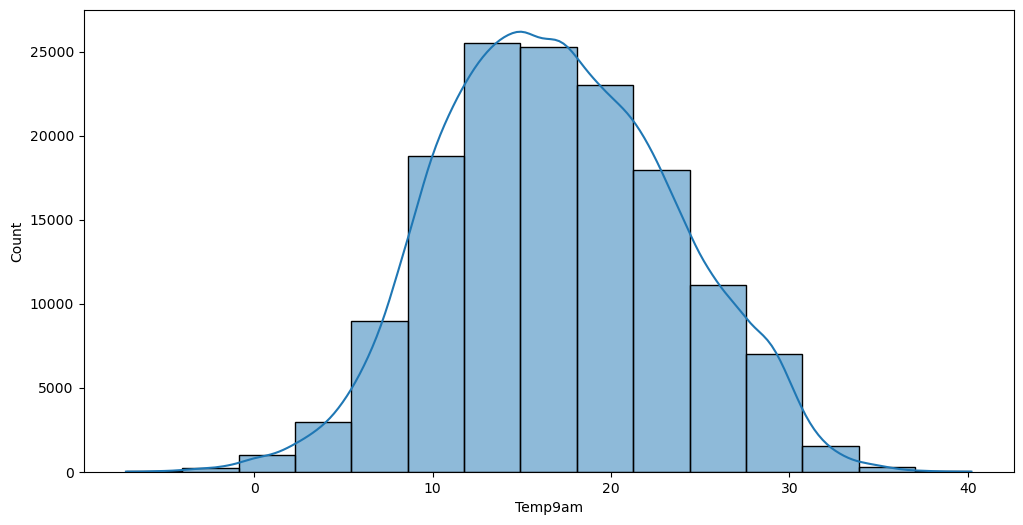

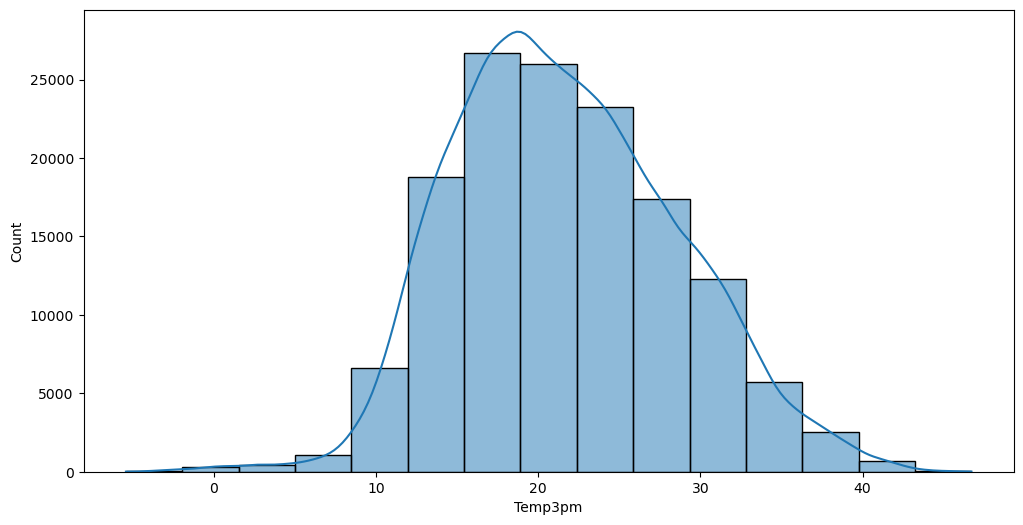

In [20]:
for i in numeric_col:
    plt.figure(figsize=(12,6));
    sns.histplot(df[i],bins=15, kde=True);

In [21]:
missing_cat = df[obj_col].isnull().sum()
print(missing_cat)

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


<BarContainer object of 6 artists>

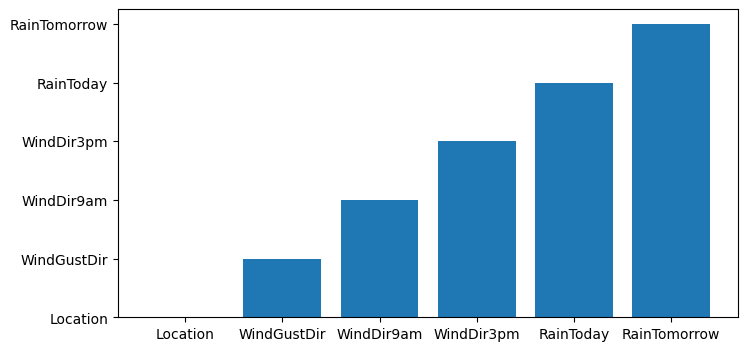

In [22]:
plt.figure(figsize= (8,4))
plt.bar(missing_cat.index,obj_col.values ) 

In [23]:
cat_features_with_null = [features for features in obj_col if df[features].isnull().sum()]  
for each_feature in cat_features_with_null:
    df[each_feature] = df[each_feature].fillna(df[each_feature].mode()[0])     

In [24]:
df[obj_col].isnull().sum() 

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [25]:
missing_num = df[numeric_col].isnull().sum() 

In [26]:
missing_num

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

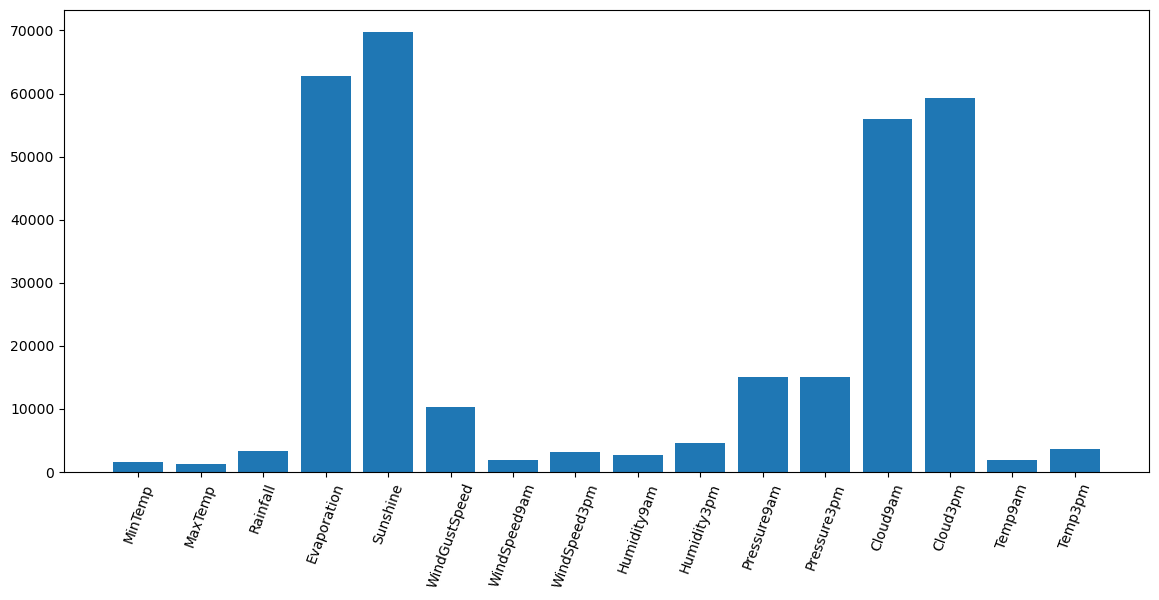

In [27]:
# ploting missing values 
plt.figure(figsize=(14,6))
plt.bar(missing_num.index,missing_num.values)    
plt.xticks(rotation=70)

In [28]:
num_col_with_null_values = [col for col in numeric_col if df[col].isnull().sum()]
missing_values = df[num_col_with_null_values].isnull().sum()
missing_values

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

<AxesSubplot:>

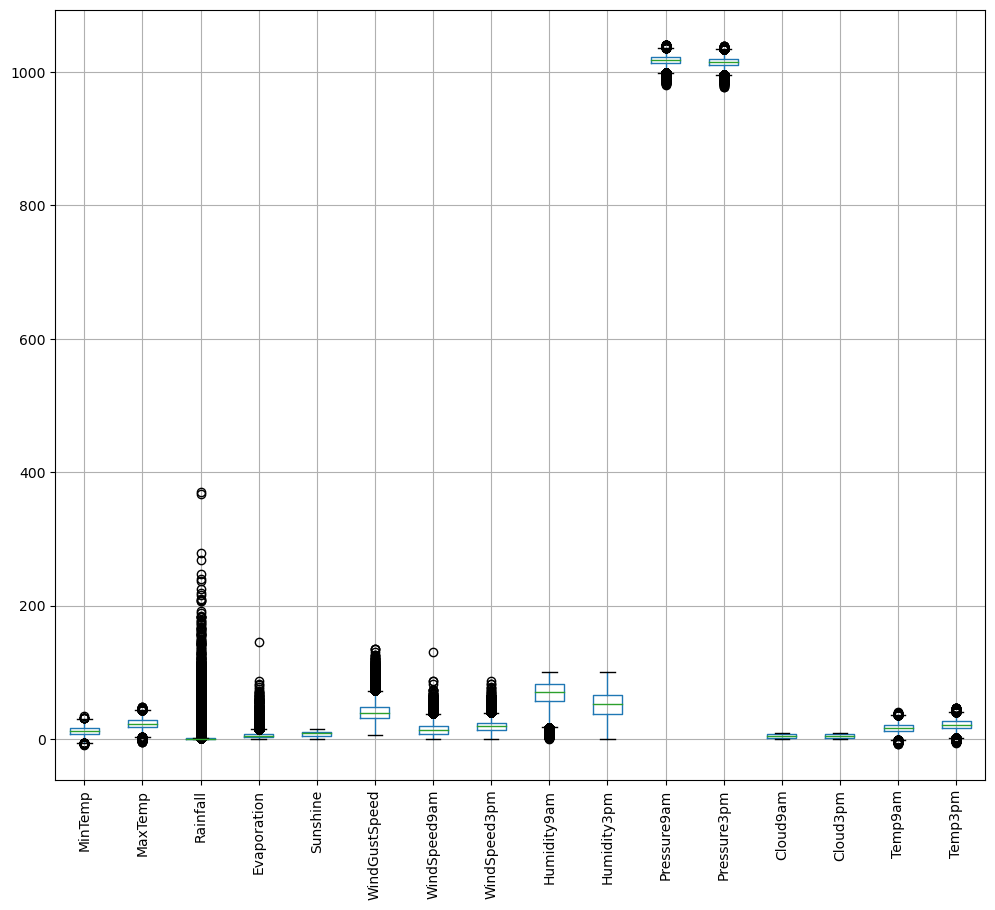

In [29]:
# lets check by box plot 
plt.figure(figsize=(12,10))
df.boxplot(num_col_with_null_values,rot = 90)

In [30]:
features_with_outliers = num_col_with_null_values
for feature in features_with_outliers:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - (IQR*1.5)
    upper_limit = Q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit, feature] = lower_limit
    df.loc[df[feature]>upper_limit, feature] = upper_limit

<AxesSubplot:>

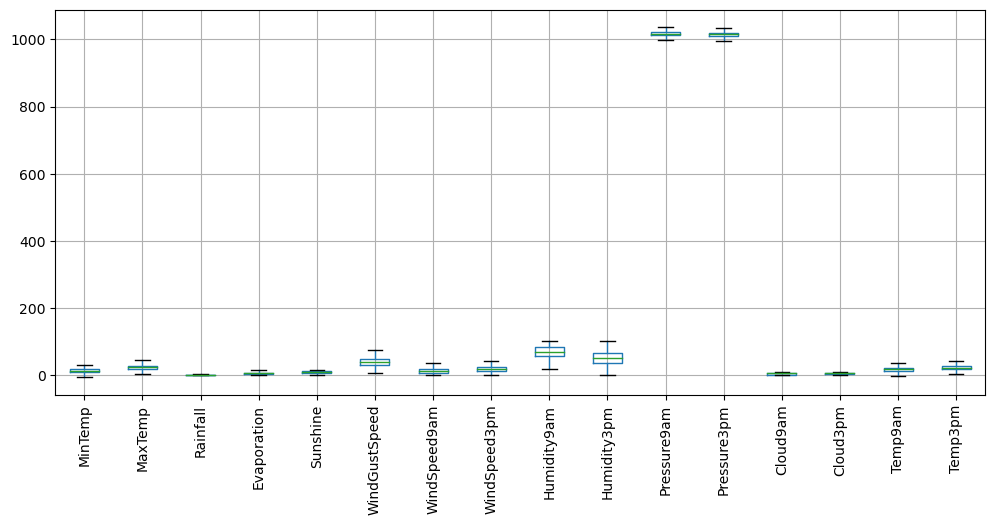

In [31]:
plt.figure(figsize=(12,5))
df.boxplot(num_col_with_null_values,rot = 90) 

In [32]:
# All missing values imputed by mean 
for features in num_col_with_null_values:
    df[features] = df[features].fillna(df[features].mean())   

In [33]:
# we can see there is no null values now
df[num_col_with_null_values].isnull().sum()  

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

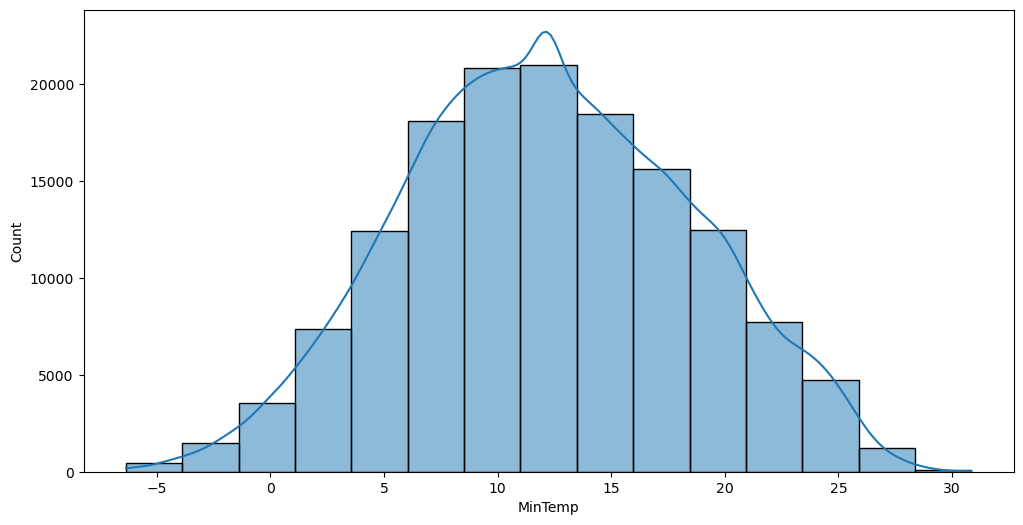

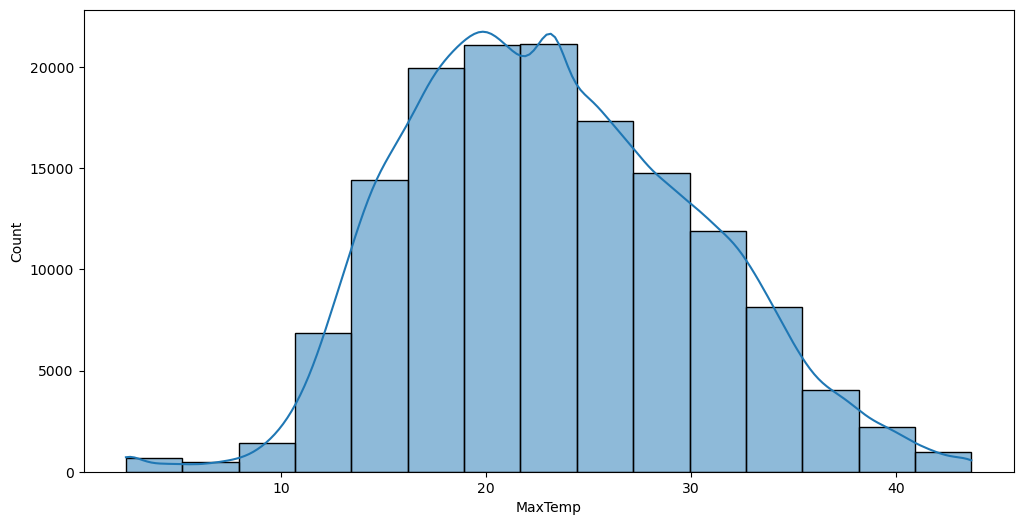

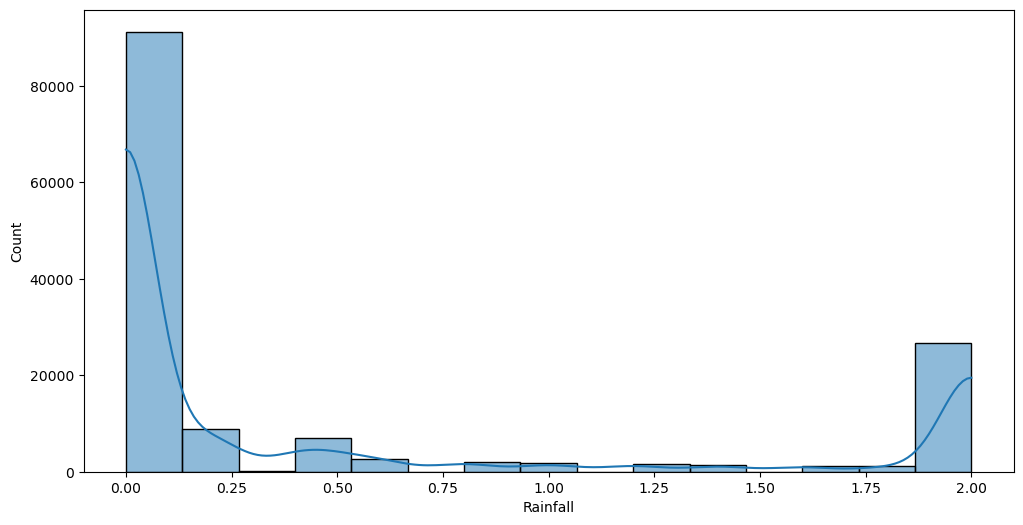

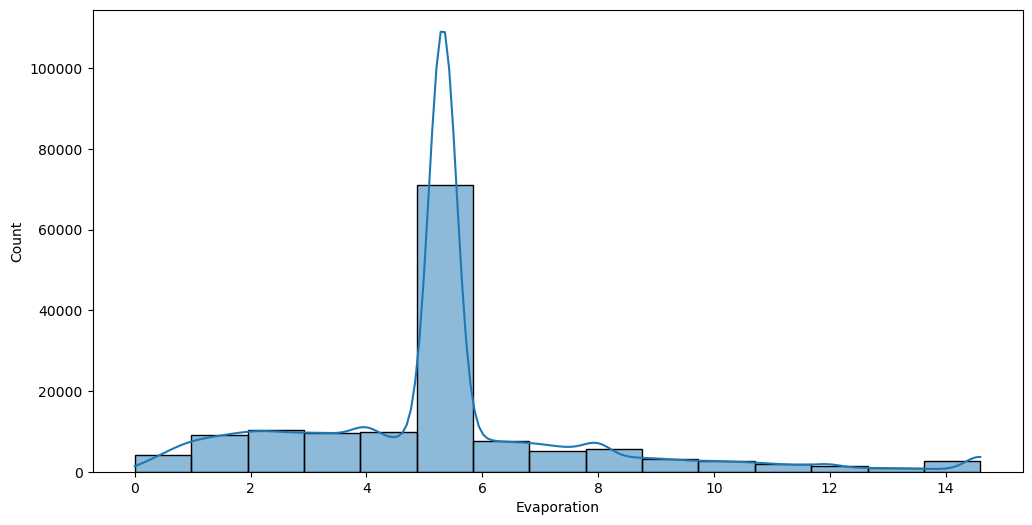

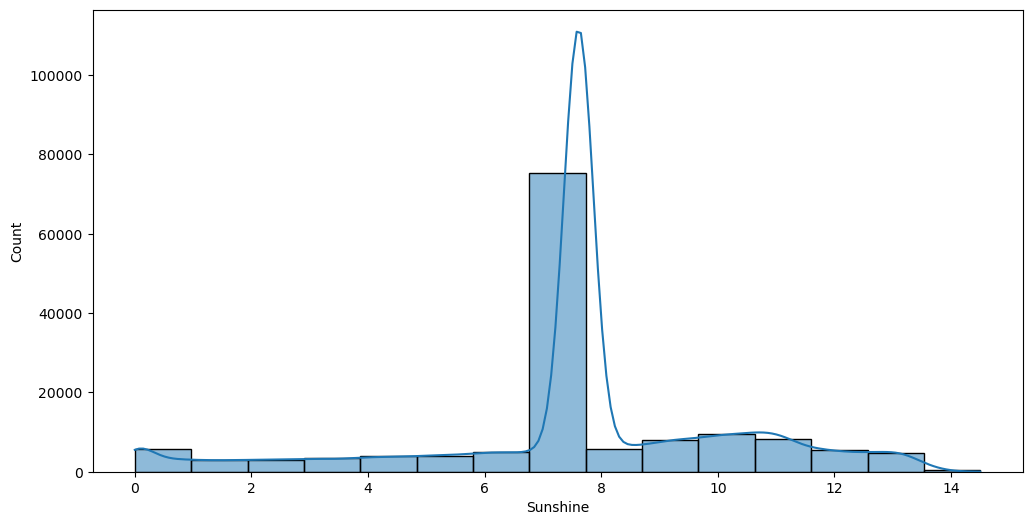

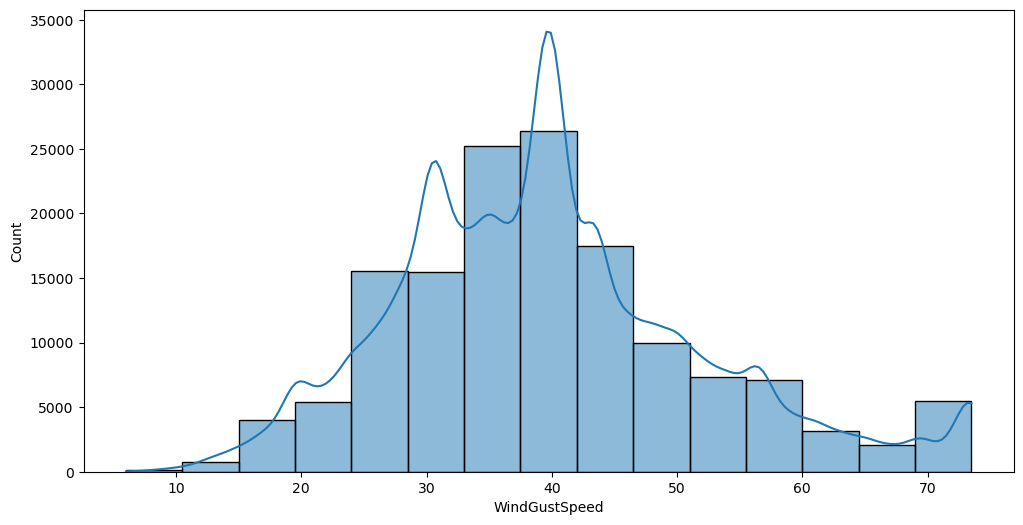

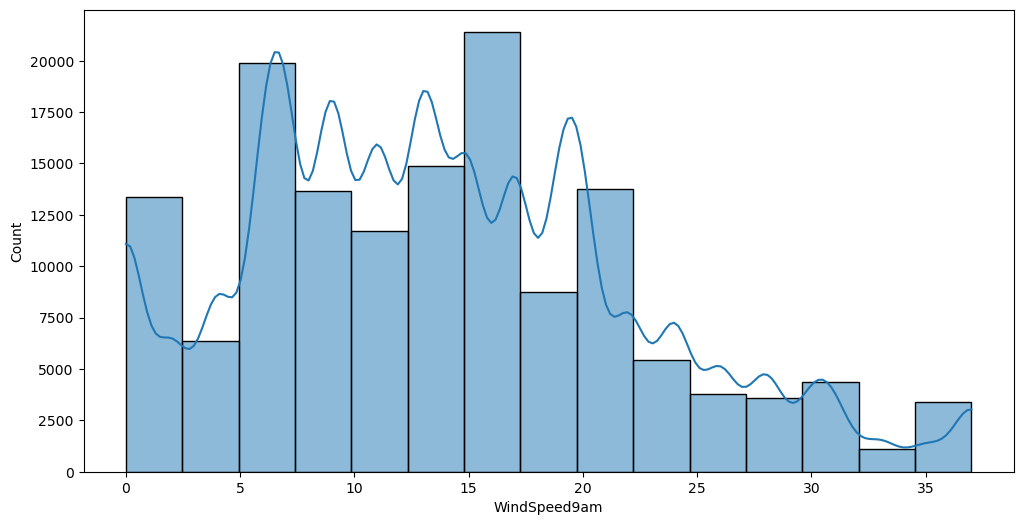

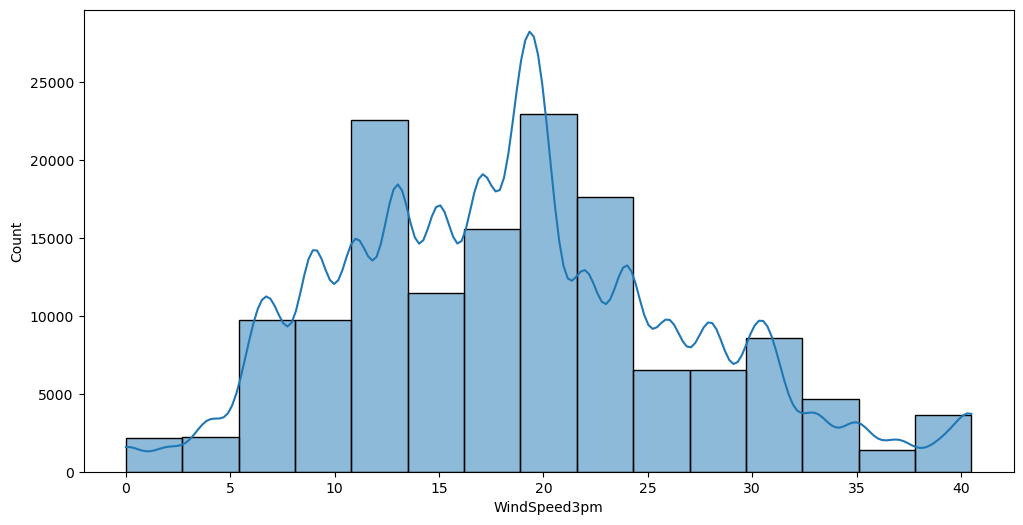

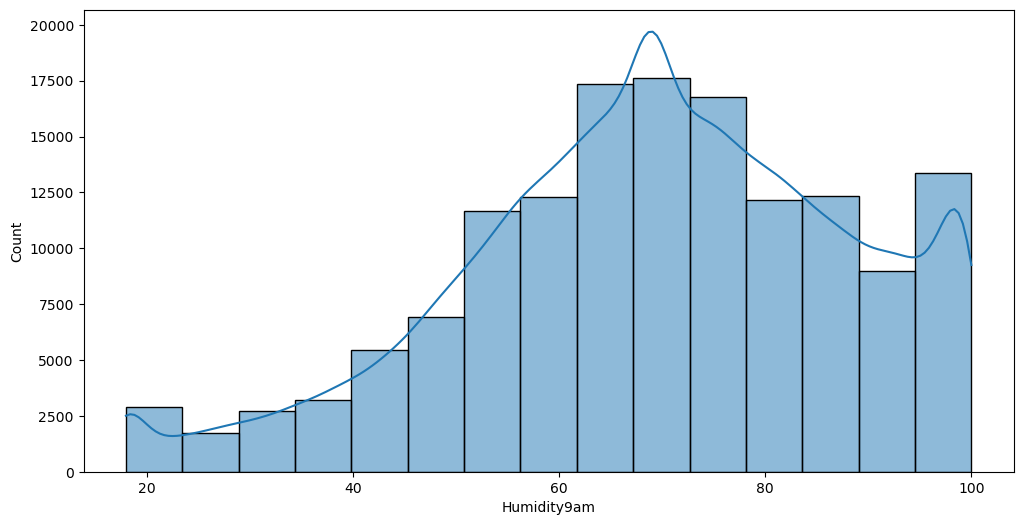

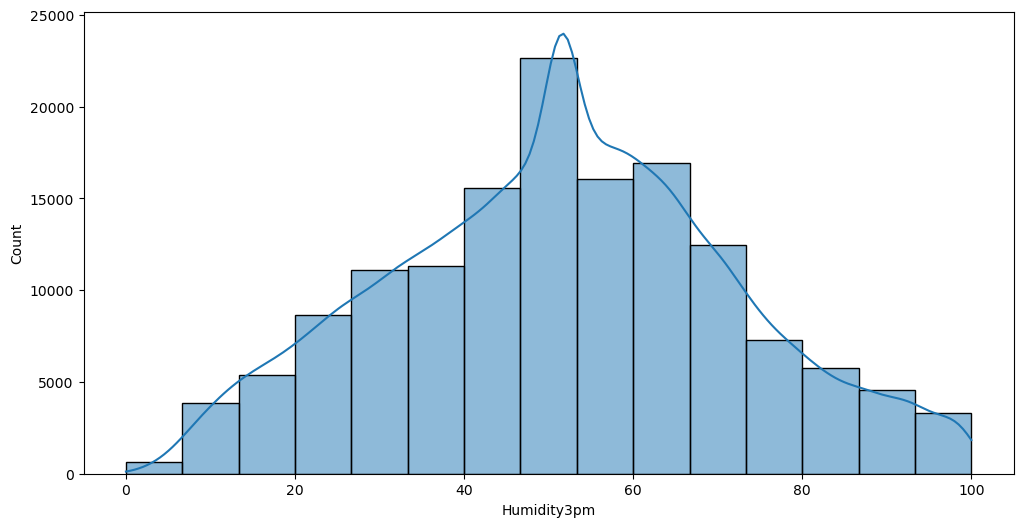

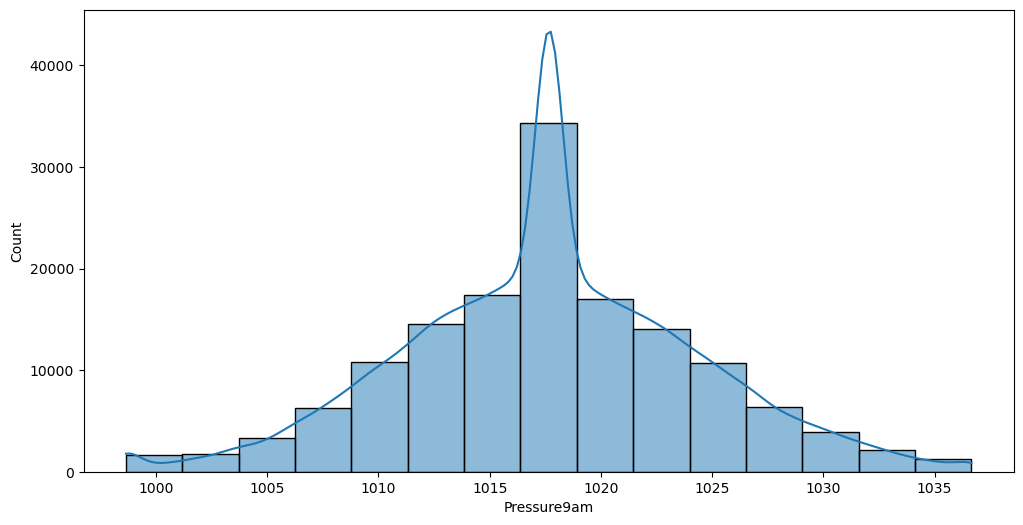

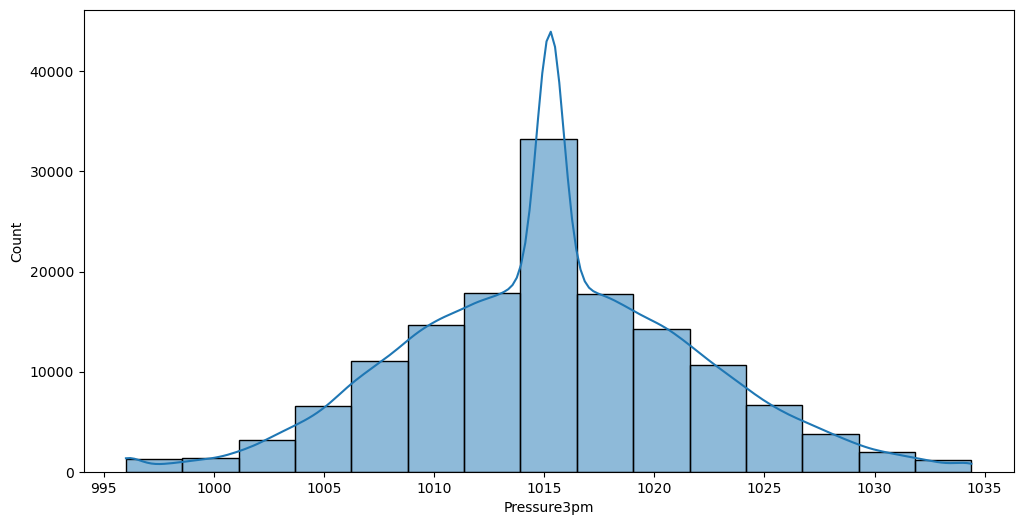

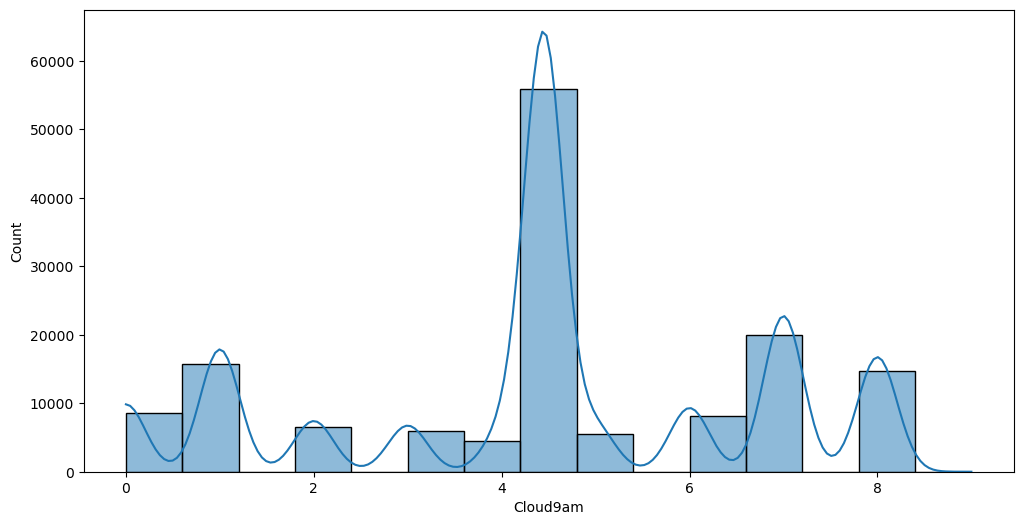

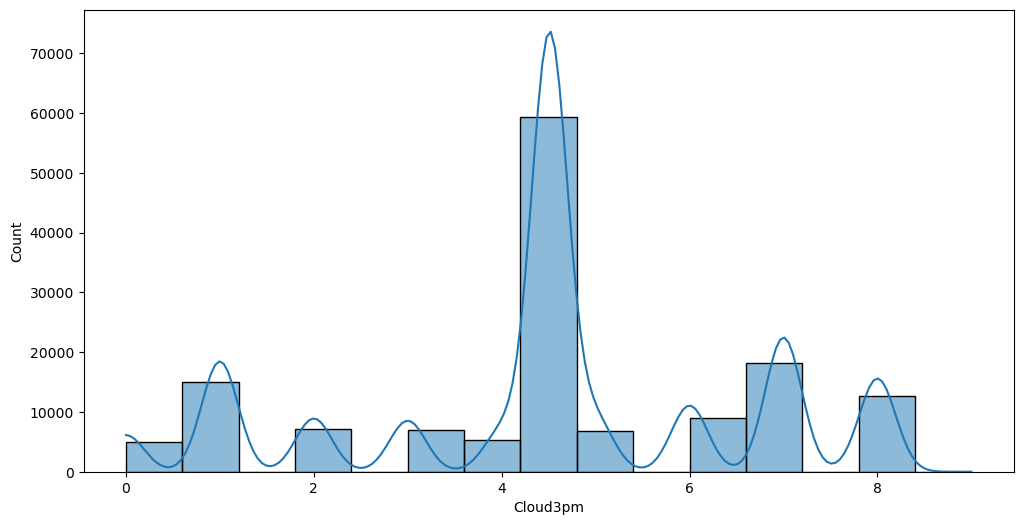

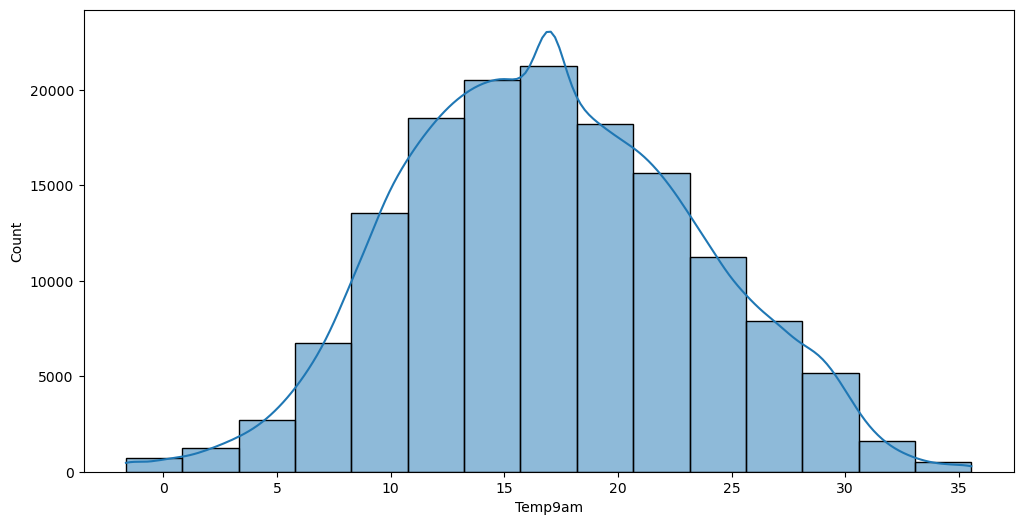

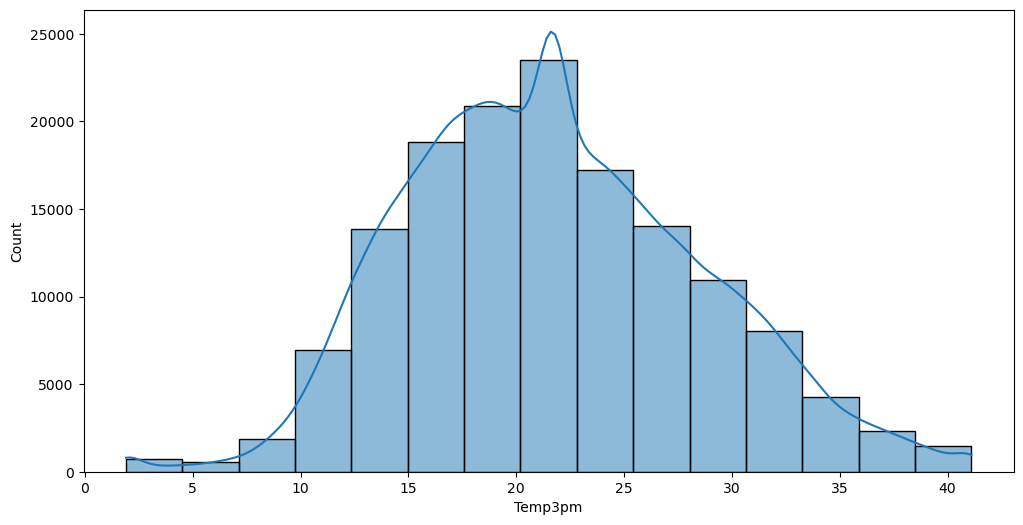

In [34]:
for i in num_col_with_null_values:
    plt.figure(figsize=(12,6));
    sns.histplot(df[i],bins=15, kde=True);

<AxesSubplot:>

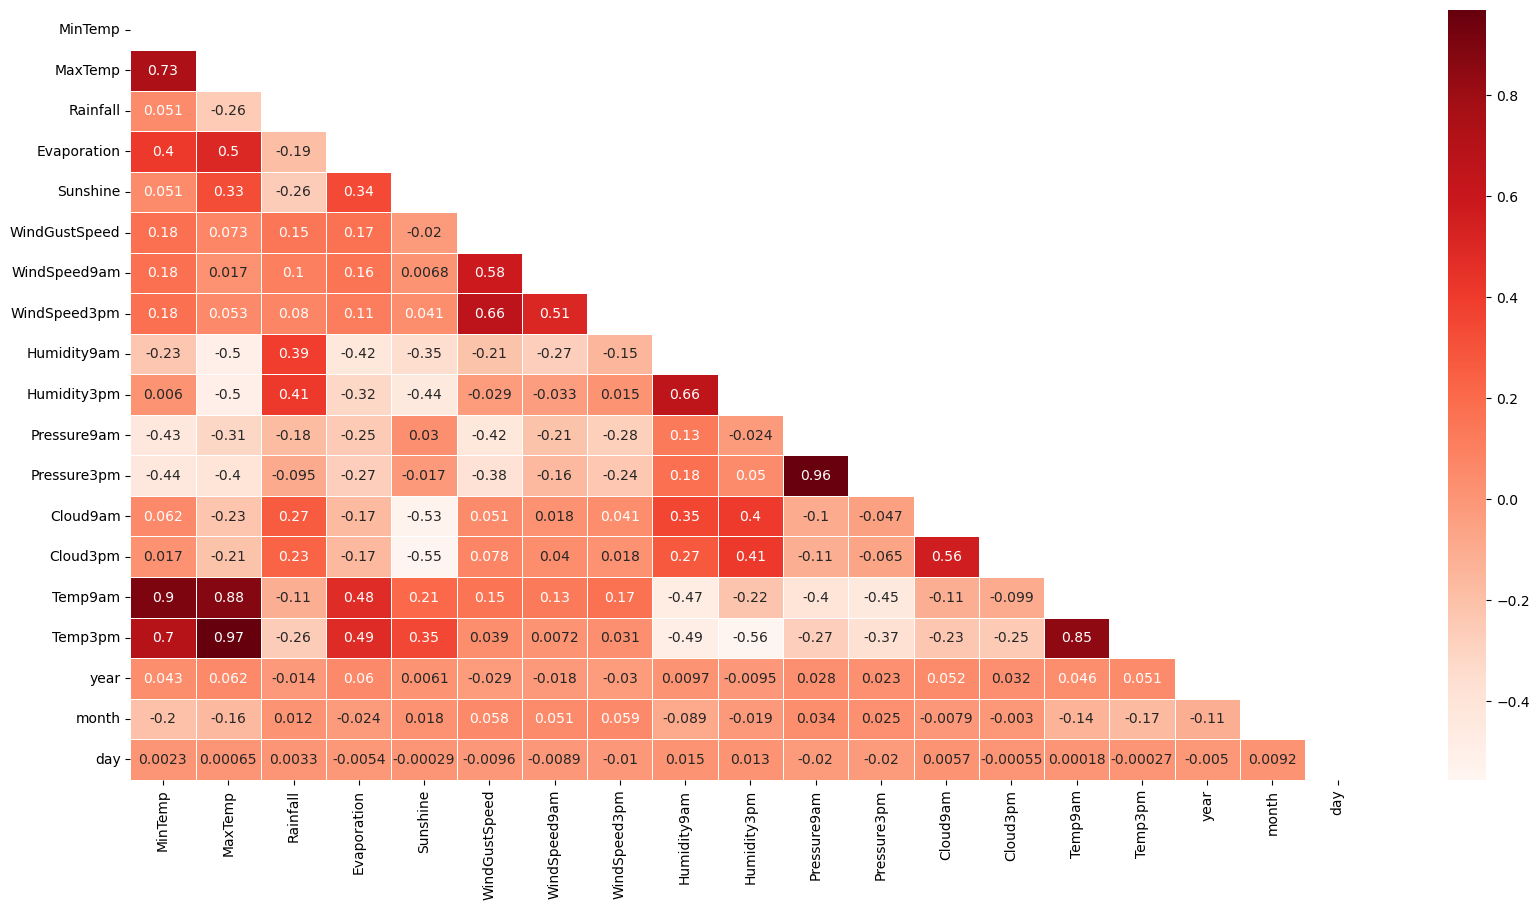

In [35]:
# Checking for the correlation between eachother by using heatmap
fig, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
sns.heatmap(df.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5)

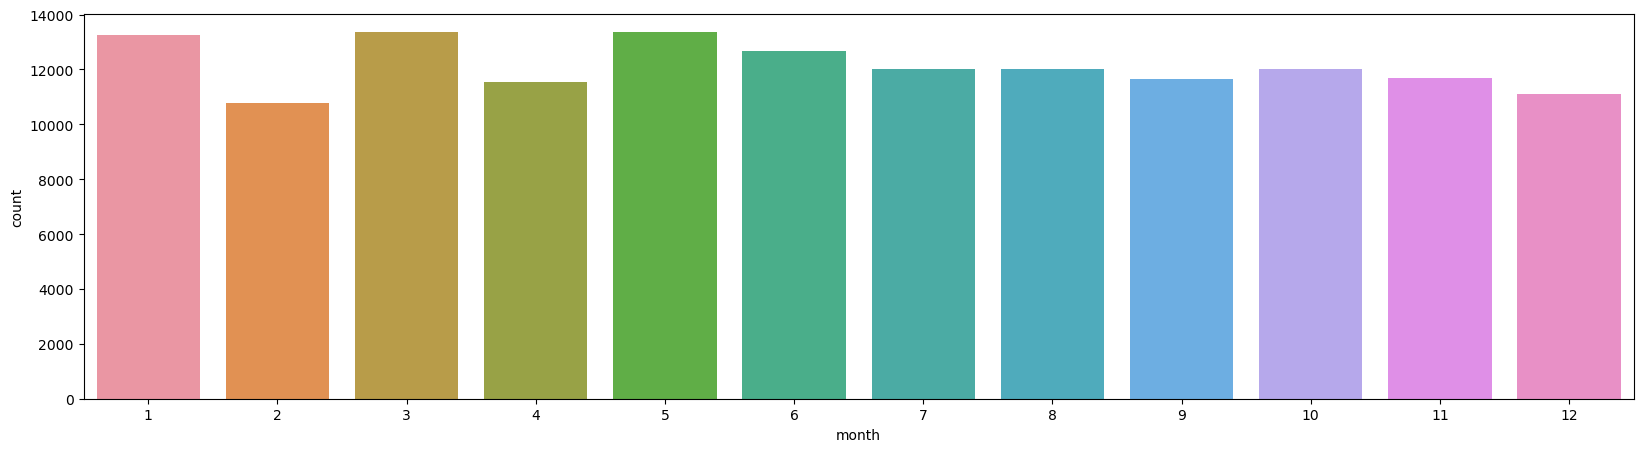

In [36]:
# Histogram that represent the df of month column
plt.figure(figsize=(20,5))
sns.countplot(df['month'])
plt.show()

# Label Encoding

In [37]:
# Convert categorized values to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[obj_col] =df[obj_col].astype('str').apply(le.fit_transform)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int32  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int32  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int32  
 9   WindDir3pm     145460 non-null  int32  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

# Splitting Data into X and Y

In [39]:
x = df.drop(['RainTomorrow'], axis = 1)

In [40]:
y = df['RainTomorrow']

In [41]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,day
0,2,13.4,22.900000,0.6,5.318667,7.611178,13,44.000000,13,14,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,2008,12,1
1,2,7.4,25.100000,0.0,5.318667,7.611178,14,44.000000,6,15,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,2008,12,2
2,2,12.9,25.700000,0.0,5.318667,7.611178,15,46.000000,13,15,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,2008,12,3
3,2,9.2,28.000000,0.0,5.318667,7.611178,4,24.000000,9,0,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,2008,12,4
4,2,17.5,32.300000,1.0,5.318667,7.611178,13,41.000000,1,7,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.400000,0.0,5.318667,7.611178,0,31.000000,9,1,...,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,2017,6,21
145456,41,3.6,25.300000,0.0,5.318667,7.611178,6,22.000000,9,3,...,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,2017,6,22
145457,41,5.4,26.900000,0.0,5.318667,7.611178,3,37.000000,9,14,...,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,2017,6,23
145458,41,7.8,27.000000,0.0,5.318667,7.611178,9,28.000000,10,3,...,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,2017,6,24


In [42]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int32

# Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Spliting Dataset into Traning set and Test set

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Model Training

Model: Random Forest

Advantages: Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.


Disadvantages: Slow real time prediction, difficult to implement, and complex algorithm.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
RF = RandomForestClassifier(n_estimators=100,random_state=0)

In [48]:
RF.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [49]:
RF.score(X_train,Y_train)

0.9999312525780283

In [50]:
Y_pred = RF.predict(X_test)

In [51]:
Y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(Y_test,Y_pred)

0.8553783399789174

In [54]:
 from sklearn.metrics import r2_score

In [55]:
r2_score(Y_test, Y_pred)

0.1603894809603691

# Model:-Linear Regression
 
 Advantage:- * Linear regression performs exceptionally well for linearly separable data
             * Easier to implement, interpret and efficient to train
            
    Disadvanatge:- * The assumption of linearity between dependent and independent variables
        
                   * It is often quite prone to noise and overfitting 

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression()

In [58]:
model = lr.fit(x,y)

In [59]:
model.score(x,y).round(2)

0.84

In [60]:
y_pred = model.predict(x)

In [61]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
accuracy_score(Y_test,Y_pred)

0.8553783399789174

In [63]:
r2_score(Y_test,Y_pred)

0.1603894809603691

# model:- Decision Trees

    Advantage:- * It can be used for both classification and regression problems
    
    Disadvantage :- * Concerning the decision tree split for numerical variables millions of records

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt = DecisionTreeClassifier()

In [72]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [73]:
dt_pred = dt.predict(X_test)

In [74]:
dt_pred

array([1, 0, 1, ..., 1, 0, 0])

In [75]:
accuracy_score(Y_test,Y_pred)

0.8553783399789174

In [76]:
r2_score(Y_test,Y_pred)

0.1603894809603691

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(Y_test,Y_pred)

array([[32592,  1395],
       [ 4916,  4735]], dtype=int64)

# model:- Logistic regression
    
    Advanatge:- * Logistic regression is easier to implement, interpret, and very efficient to train.
    Disadvantag:- * If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting. 

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
le = LogisticRegression()

In [81]:
le.fit(X_train,Y_train)

LogisticRegression()

In [82]:
le_pred = le.predict(X_test)

In [84]:
le_pred

array([1, 0, 0, ..., 1, 0, 1])

In [85]:
accuracy_score(Y_test,Y_pred)

0.8553783399789174

In [86]:
r2_score(Y_test,Y_pred)

0.1603894809603691

# model:- SVM 
    
    Advantages:- * SVM works relatively well when there is a clear margin of separation between classes.
                 * SVM is more effective in high dimensional spaces.
    Disadvantages:- * SVM algorithm is not suitable for large data sets.     
                    * SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.

In [90]:
from sklearn.svm import SVC

In [91]:
model = SVC()

In [92]:
model.fit(X_train,Y_train)

SVC()

In [93]:
y_pred = model.predict(X_test)

In [94]:
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [96]:
accuracy_score(Y_test,Y_pred)

0.8553783399789174

In [100]:
r2_score(Y_test,Y_pred)

0.1603894809603691

In [98]:
confusion_matrix(Y_test,Y_pred)

array([[32592,  1395],
       [ 4916,  4735]], dtype=int64)

# KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
kn = KNeighborsClassifier(n_neighbors=6)

In [104]:
kn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [105]:
y_pred = kn.predict(X_test)

In [106]:
y_pred 

array([1, 0, 1, ..., 1, 0, 0])

In [107]:
accuracy_score(Y_test,Y_pred)

0.8553783399789174

In [108]:
r2_score(Y_test,Y_pred)

0.1603894809603691